In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [2]:

data=pd.read_csv("D:/EDU/Udemy/datascience_csv_files/p5_advanced_stats_ml/S38_L256/3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


there seems to be 3 clusters on basis of longitude and latitude


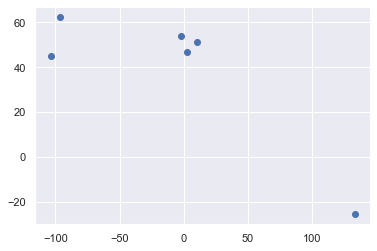

In [3]:
#lets get little insight in data using scatter plot
print('there seems to be 3 clusters on basis of longitude and latitude')
plt.scatter(data['Longitude'],data['Latitude'])

In [4]:
data1=data.copy()
x=data1.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustring

In [5]:
#lets randomly  give the numer of clusters to KMeans for clustring
kmeans=KMeans(2)
kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### fit_predict()

In [6]:
created_clusters=kmeans.fit_predict(x)
created_clusters

array([1, 1, 1, 1, 1, 0])

In [7]:
data1['cluster']=created_clusters
data1

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


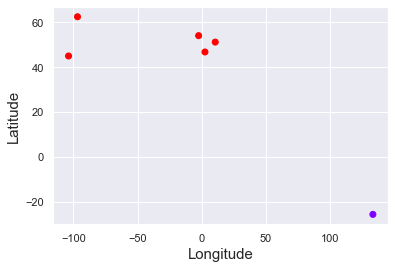

In [8]:
plt.scatter(data1['Longitude'],data1['Latitude'],c=data1['cluster'],cmap='rainbow')
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Latitude',fontsize=15)
plt.show()

### Similarly For k=3

In [9]:
kmeans=KMeans(3)
kmeans.fit(x)
created_clusters=kmeans.fit_predict(x)
data1['cluster']=created_clusters
data1

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


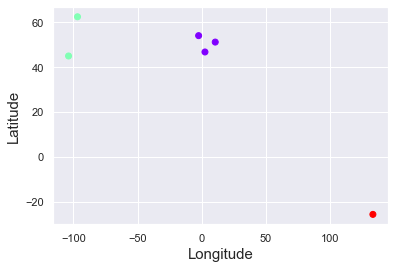

In [10]:
plt.scatter(data1['Longitude'],data1['Latitude'],c=data1['cluster'],cmap='rainbow')
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Latitude',fontsize=15)
plt.show()

## Clustring on categorical data

In [11]:
#first map the categorical variable
data2=data.copy()
data2['mapped_lang']=data2['Language'].map({'English':0,'French':1,'German':2})
data2

,Country,Latitude,Longitude,Language,mapped_lang
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


In [15]:
x1=data2.iloc[:,4:]
kmeans=KMeans(3)
kmeans.fit(x1)
created_clusters2=kmeans.fit_predict(x1)
data2['cluster']=created_clusters2
data2

,Country,Latitude,Longitude,Language,mapped_lang,cluster
0,USA,44.97,-103.77,English,0,0
1,Canada,62.40,-96.80,English,0,0
2,France,46.75,2.40,French,1,1
3,UK,54.01,-2.53,English,0,0
4,Germany,51.15,10.40,German,2,2
5,Australia,-25.45,133.11,English,0,0


You can see that all english speaking countries are in cluster 0 ,similarly for others in 1 and 2 cluster


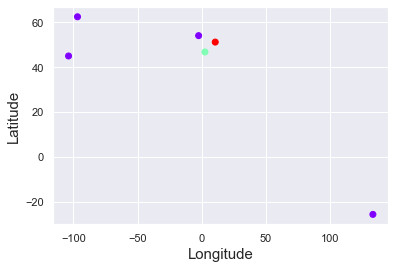

In [16]:
plt.scatter(data1['Longitude'],data1['Latitude'],c=data2['cluster'],cmap='rainbow')
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Latitude',fontsize=15)
print('You can see that all english speaking countries are in cluster 0 ,similarly for others in 1 and 2 cluster')
plt.show()

### Deciding best value for "k" using elbow method

In [17]:
x_wcss=data.iloc[:,1:3]
kmeans_wcss=KMeans(3)
kmeans_wcss.fit(x_wcss)
kmeans_wcss.inertia_

288.1052333333333

### Ploting k v/s wcss

In [22]:
wcss=[]
for i in range(1,7):
    km=KMeans(i)
    km.fit(x_wcss)
    km_inertia=km.inertia_
    wcss.append(km_inertia)
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

After k=3 no change in wcss so optimal k=3,and sub-optimal k =2


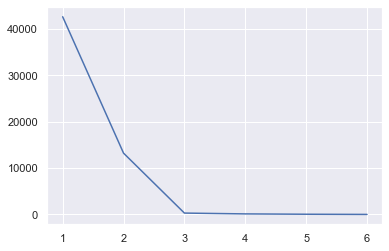

In [25]:
k_list=[i for i in range(1,7)]

plt.plot(k_list,wcss)
print('After k=3 no change in wcss so optimal k=3,and sub-optimal k =2')

# Market Segmentation Example

In [26]:

    
data_seg=pd.read_csv("D:/EDU/Udemy/datascience_csv_files/p5_advanced_stats_ml/S38_L265/3.12. Example.csv")
data_seg

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


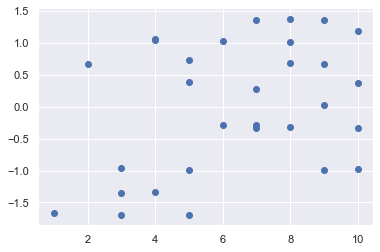

In [27]:
plt.scatter(data_seg['Satisfaction'],data_seg['Loyalty'])

In [54]:
#use iloc[],it automaticaly converts 1D array to 2D

#on basis of satisfaction only
x_setf=data_seg.iloc[:,0:1]
kmeans_setf=KMeans(2)
kmeans_setf.fit(x_setf)
cluster_setf=kmeans_seg.fit_predict(x_setf)

#on basis of loyalty
x_loyl=data_seg.iloc[:,1:2]
kmeans_loyl=KMeans(2)
kmeans_loyl.fit(x_loyl)
cluster_loyl=kmeans_loyl.fit_predict(x_loyl)
 
#on basis of both var.
x_seg=data_seg.iloc[:,0:]
kmeans_seg=KMeans(2)
kmeans_seg.fit(x_seg)
cluster_seg=kmeans_seg.fit_predict(x_seg)
cluster_seg



array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1])

In [55]:
data_seg1=data_seg.copy()
data_seg1['cluster_both']=cluster_seg
data_seg1['cluster_setf']=cluster_setf
data_seg1['cluster_loyl']=cluster_loyl
data_seg1

,Satisfaction,Loyalty,cluster_both,cluster_setf,cluster_loyl
0,4,-1.33,1,0,0
1,6,-0.28,1,0,0
2,5,-0.99,1,0,0
3,7,-0.29,0,1,0
4,4,1.06,1,0,1
5,1,-1.66,1,0,0
6,10,-0.97,0,1,0
7,8,-0.32,0,1,0
8,8,1.02,0,1,1
9,8,0.68,0,1,1


You can see that on basis of SATISFACTION and on basis of BOTH VARS the clusters are almost same....this is becouse of more weight of SATISFACTION


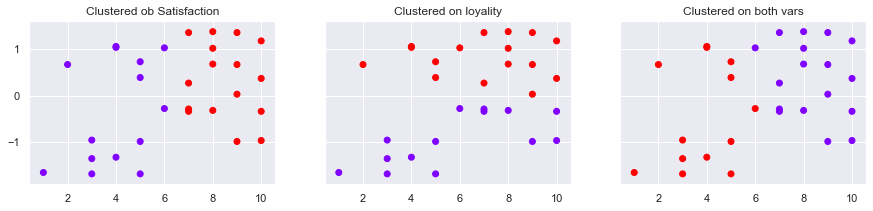

In [56]:
f,(g1,g2,g3)=plt.subplots(1,3,sharey=True,sharex=True,figsize=(15,3))
g1.scatter(data_seg1['Satisfaction'],data_seg1['Loyalty'],c=data_seg1['cluster_setf'],cmap='rainbow')
g2.scatter(data_seg1['Satisfaction'],data_seg1['Loyalty'],c=data_seg1['cluster_loyl'],cmap='rainbow')
g3.scatter(data_seg1['Satisfaction'],data_seg1['Loyalty'],c=data_seg1['cluster_both'],cmap='rainbow')

g1.set_title('Clustered ob Satisfaction')
g2.set_title('Clustered on loyality')
g3.set_title('Clustered on both vars')
print('You can see that on basis of SATISFACTION and on basis of BOTH VARS the clusters are almost same....this is becouse of more weight of SATISFACTION')
plt.show()

##### SO in above condition we need to standarize the data ....as both varaibles are eqauly important

### Standardizing the variables based on their individuality

In [58]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x_seg)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [62]:
data_seg2=data_seg.copy()
kmeans_seg_scaled=KMeans(2)
kmeans_seg_scaled.fit(x_scaled)
cluster_seg_scaled=kmeans_seg_scaled.fit_predict(x_scaled)
cluster_seg_scaled
data_seg2['cluster_seg']=cluster_seg_scaled
data_seg2

,Satisfaction,Loyalty,cluster_seg
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


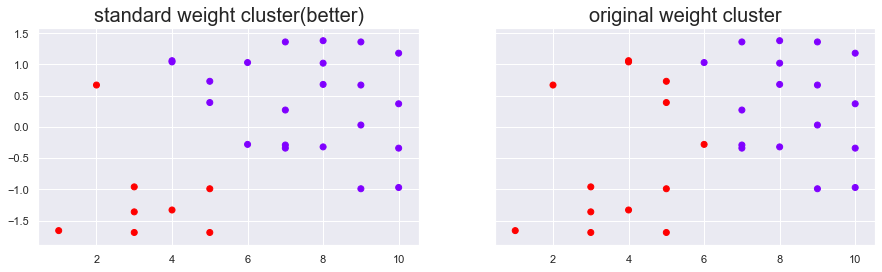

WE CAN SEE THAT HERE CLUSTRING WITH STANDARDIZATION SHOWS BETTER RESULTS


In [72]:
f,(g1,g2)=plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,4))
g1.scatter(data_seg1['Satisfaction'],data_seg1['Loyalty'],c=data_seg2['cluster_seg'],cmap='rainbow')
g2.scatter(data_seg1['Satisfaction'],data_seg1['Loyalty'],c=data_seg1['cluster_both'],cmap='rainbow')


g1.set_title('standard weight cluster(better)',size=20)
g2.set_title('original weight cluster',size=20)
plt.show()
print('WE CAN SEE THAT HERE CLUSTRING WITH STANDARDIZATION SHOWS BETTER RESULTS')

## Chosing optimal "k"

In [78]:
wcss2=[]
for i in range(1,10):
    kmeans_elbow2=KMeans(i)
    kmeans_elbow2.fit(x_scaled)
    wcss_inst=kmeans_elbow2.inertia_
    wcss2.append(wcss_inst)
wcss2

[60.0,
 29.818973034723147,
 18.129659446063226,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.34807941029098,
 4.337110750237059,
 3.687975963852466]

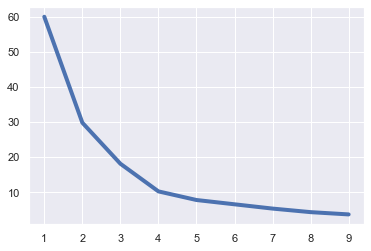

In [80]:
plt.plot(range(1,10),wcss2,lw=4)

##### Optimal number is 4 ...although we can see the plots using 3 and 5 also ...


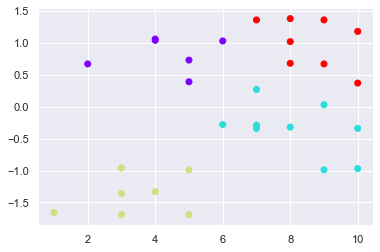

In [84]:
kmeans_seg_scaled=KMeans(4)
kmeans_seg_scaled.fit(x_scaled)
cluster_seg_scaled=kmeans_seg_scaled.fit_predict(x_scaled)
data_seg2['cluster_seg']=cluster_seg_scaled
plt.scatter(data_seg1['Satisfaction'],data_seg1['Loyalty'],c=data_seg2['cluster_seg'],cmap='rainbow')


We can see that only the group with low loyality and high satisfaction is subdivided in 2 groups ...which is errelevant


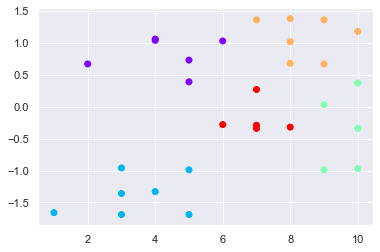

In [87]:
kmeans_seg_scaled=KMeans(5)
kmeans_seg_scaled.fit(x_scaled)
cluster_seg_scaled=kmeans_seg_scaled.fit_predict(x_scaled)
data_seg2['cluster_seg']=cluster_seg_scaled
plt.scatter(data_seg1['Satisfaction'],data_seg1['Loyalty'],c=data_seg2['cluster_seg'],cmap='rainbow')
print('We can see that only the group with low loyality and high satisfaction is subdivided in 2 groups ...which is errelevant')